In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [206]:
from sklearn.datasets import load_iris
iris = load_iris()

In [207]:
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [208]:
y = iris.target

In [209]:
X_df = pd.DataFrame(X, columns=iris.feature_names)
y_df = pd.DataFrame(y, columns=['target'])
df = pd.concat([X_df, y_df], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


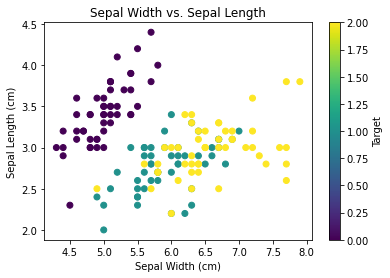

In [210]:
import matplotlib.pyplot as plt

plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['target'])

plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Width vs. Sepal Length')

cbar = plt.colorbar()
cbar.set_label('Target')

plt.show()

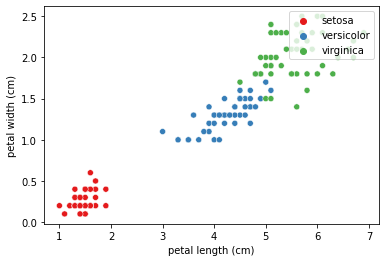

In [211]:
df['class'] = iris.target_names[y]

sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='class', palette='Set1')
plt.legend(loc='upper right')
plt.show()

In [212]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [213]:
y_pred = km.fit_predict(X)
print(y_pred)

accuracy = accuracy_score(y, y_pred)
print("Doğruluk Oranı: {:.2f}".format(accuracy))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Doğruluk Oranı: 0.24


In [214]:
df['cluster'] = y_pred
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class,cluster
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1


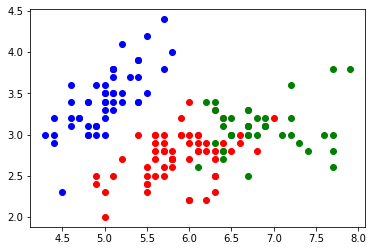

In [215]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green')

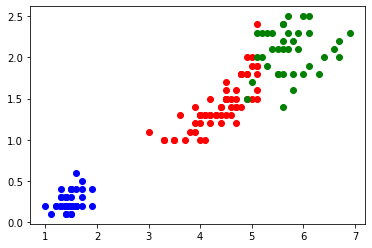

In [216]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')

In [217]:
from sklearn.cluster import DBSCAN
db = DBSCAN()

In [218]:
y_pred = db.fit_predict(X)

In [219]:
df['dbscan'] = y_pred
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class,cluster,dbscan
0,5.1,3.5,1.4,0.2,0,setosa,1,0
1,4.9,3.0,1.4,0.2,0,setosa,1,0
2,4.7,3.2,1.3,0.2,0,setosa,1,0
3,4.6,3.1,1.5,0.2,0,setosa,1,0
4,5.0,3.6,1.4,0.2,0,setosa,1,0


In [220]:
accuracy = accuracy_score(y, y_pred)
print("Doğruluk Oranı: {:.2f}".format(accuracy))

Doğruluk Oranı: 0.62


In [221]:
sse = []

for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

print(sse)

[152.3479517603579, 78.851441426146, 57.255523809523815, 46.44618205128206, 39.03998724608725, 34.427777417027414, 30.014398496240606, 28.39650330371383]


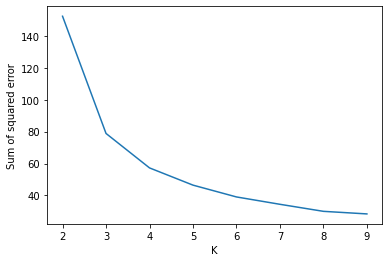

In [222]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(2, 10),sse)